<a href="https://colab.research.google.com/github/makhijakabir/plantDiseaseDetection/blob/main/plantDiseaseDetectionExplore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mini Project for Sem 5 CSBS

##Topic: Plant Disease Detection

###This project analyses more than 4870 images from Pepper Bell, Potato, and Tomato plants' leaves for 6 different kinds of viruses and diseases and categorises them accordingly.

###This is the Data Exploration and Pickling segment of the project

##Imports and Constant

In [1]:
!pip install opencv-python

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import os

import cv2
from tqdm import tqdm

import random

import pickle

In [14]:
imgSizeDefault = tuple((256, 256))
imgSize = 500
directoryRoot = '/content/drive/MyDrive/Colab Notebooks/PlantVillageShort'

width=256
height=256
depth=3

categories = ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___healthy', 'Potato___Late_blight', 'Tomato_Bacterial_spot', 'Tomato_healthy']

##Data Exploration
###Explores 16 different kinds of leaf images


###To return the Pepper Bell leaf containing a Bacterial Spot

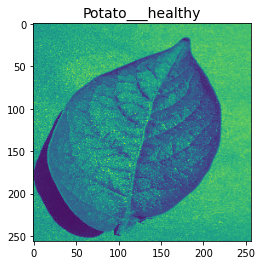

In [4]:
for category in categories:
    path = os.path.join(directoryRoot, category)
    for img in os.listdir(path):
        imgArray = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(imgArray)
        plt.title(category, fontsize=14)
        plt.show()
        break
    break

In [5]:
print (imgArray.shape)

(256, 256)


###Resize the images to *500x500* pixels

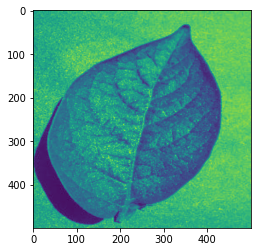

In [6]:
newArray = cv2.resize(imgArray, (imgSize, imgSize))
plt.imshow(newArray)
plt.show()

##Data Pre-Processing: Creating Training Dataset and Resizing

In [7]:
trainingData = []

def createTrainData():
    for category in categories:

        path = os.path.join(directoryRoot, category)
        classNum = categories.index(category)

        for img in tqdm(os.listdir(path)):
            try:
                imgArray = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                newArray = cv2.resize(imgArray, (imgSize, imgSize))
                trainingData.append([newArray, classNum])
            except Exception as e:
                pass

createTrainData()

print(len(trainingData))

100%|██████████| 1591/1591 [00:26<00:00, 60.26it/s] 

4870


In [8]:
len(trainingData)

4870

In [9]:
random.shuffle(trainingData)

In [10]:
for sample in trainingData[:20]:
    print(sample[1])

3
2
3
2
2
3
2
0
2
3
1
2
1
3
2
3
3
1
2
1


In [11]:
X = []
y = []

for features, label in trainingData:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, imgSize, imgSize, 1))

X = np.array(X).reshape(-1, imgSize, imgSize, 1) 

[[[[136]
   [133]
   [129]
   ...
   [120]
   [133]
   [140]]

  [[143]
   [138]
   [129]
   ...
   [121]
   [130]
   [135]]

  [[155]
   [146]
   [129]
   ...
   [123]
   [124]
   [125]]

  ...

  [[ 85]
   [ 84]
   [ 84]
   ...
   [ 69]
   [ 68]
   [ 67]]

  [[ 80]
   [ 80]
   [ 79]
   ...
   [ 69]
   [ 67]
   [ 66]]

  [[ 78]
   [ 78]
   [ 77]
   ...
   [ 69]
   [ 67]
   [ 66]]]]


In [12]:
pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [13]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)